In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import holidays
import numpy as np


# Análise Global

In [53]:
data = pd.read_csv('dados/training_data.csv', encoding="latin1")

In [54]:
data.head()

city_name          record_date AVERAGE_SPEED_DIFF  AVERAGE_FREE_FLOW_SPEED  \
0     Porto  2019-08-29 07:00:00             Medium                     41.5   
1     Porto  2018-08-10 14:00:00               High                     41.7   
2     Porto  2019-09-01 16:00:00               High                     38.6   
3     Porto  2019-02-26 11:00:00               High                     37.4   
4     Porto  2019-06-06 12:00:00             Medium                     41.6   

   AVERAGE_TIME_DIFF  AVERAGE_FREE_FLOW_TIME LUMINOSITY  AVERAGE_TEMPERATURE  \
0               11.5                    71.4      LIGHT                 15.0   
1               48.3                    87.4      LIGHT                 21.0   
2               38.4                    85.2      LIGHT                 26.0   
3               61.0                    94.1      LIGHT                 18.0   
4               50.4                    77.0      LIGHT                 15.0   

   AVERAGE_ATMOSP_PRESSURE  AVERAGE_HUMIDITY  AVERAGE_WIND_SPEED  \
0                   1019.0             100.0                 3.0   
1                   1021.0              53.0                 5.0   
2                   1014.0              61.0                 4.0   
3                   1025.0              48.0                 4.0   
4                   1008.0              82.0                10.0   

  AVERAGE_CLOUDINESS  AVERAGE_PRECIPITATION AVERAGE_RAIN  
0                NaN                    0.0          NaN  
1          céu claro                    0.0          NaN  
2                NaN                    0.0          NaN  
3          céu claro                    0.0          NaN  
4                NaN                    0.0          NaN

In [55]:
data.tail()

city_name          record_date AVERAGE_SPEED_DIFF  \
6807     Porto  2019-02-23 09:00:00                Low   
6808     Porto  2019-06-08 18:00:00             Medium   
6809     Porto  2018-10-02 04:00:00                NaN   
6810     Porto  2019-01-30 01:00:00                NaN   
6811     Porto  2019-06-15 21:00:00             Medium   

      AVERAGE_FREE_FLOW_SPEED  AVERAGE_TIME_DIFF  AVERAGE_FREE_FLOW_TIME  \
6807                     41.2                3.7                    86.9   
6808                     38.9               51.9                    76.9   
6809                     39.6                0.0                    89.1   
6810                     41.6                0.0                    85.5   
6811                     41.7               32.9                    78.1   

     LUMINOSITY  AVERAGE_TEMPERATURE  AVERAGE_ATMOSP_PRESSURE  \
6807      LIGHT                  9.0                   1030.0   
6808      LIGHT                 17.0                   1020.0   
6809       DARK                 15.0                   1020.0   
6810       DARK                  8.0                   1018.0   
6811       DARK                 15.0                   1021.0   

      AVERAGE_HUMIDITY  AVERAGE_WIND_SPEED AVERAGE_CLOUDINESS  \
6807              71.0                 4.0          céu claro   
6808              63.0                 6.0                NaN   
6809              39.0                 4.0          céu claro   
6810              81.0                 1.0     algumas nuvens   
6811              72.0                 4.0                NaN   

      AVERAGE_PRECIPITATION AVERAGE_RAIN  
6807                    0.0          NaN  
6808                    0.0          NaN  
6809                    0.0          NaN  
6810                    0.0          NaN  
6811                    0.0          NaN

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   city_name                6812 non-null   object 
 1   record_date              6812 non-null   object 
 2   AVERAGE_SPEED_DIFF       4612 non-null   object 
 3   AVERAGE_FREE_FLOW_SPEED  6812 non-null   float64
 4   AVERAGE_TIME_DIFF        6812 non-null   float64
 5   AVERAGE_FREE_FLOW_TIME   6812 non-null   float64
 6   LUMINOSITY               6812 non-null   object 
 7   AVERAGE_TEMPERATURE      6812 non-null   float64
 8   AVERAGE_ATMOSP_PRESSURE  6812 non-null   float64
 9   AVERAGE_HUMIDITY         6812 non-null   float64
 10  AVERAGE_WIND_SPEED       6812 non-null   float64
 11  AVERAGE_CLOUDINESS       4130 non-null   object 
 12  AVERAGE_PRECIPITATION    6812 non-null   float64
 13  AVERAGE_RAIN             563 non-null    object 
dtypes: float64(8), object(6)

In [57]:
data.isna().sum()

city_name                     0
record_date                   0
AVERAGE_SPEED_DIFF         2200
AVERAGE_FREE_FLOW_SPEED       0
AVERAGE_TIME_DIFF             0
AVERAGE_FREE_FLOW_TIME        0
LUMINOSITY                    0
AVERAGE_TEMPERATURE           0
AVERAGE_ATMOSP_PRESSURE       0
AVERAGE_HUMIDITY              0
AVERAGE_WIND_SPEED            0
AVERAGE_CLOUDINESS         2682
AVERAGE_PRECIPITATION         0
AVERAGE_RAIN               6249
dtype: int64

In [58]:
data.drop(['city_name', 'AVERAGE_RAIN', 'AVERAGE_PRECIPITATION'], axis=1, inplace=True)

In [59]:
data["record_date"] = pd.to_datetime(data["record_date"])

In [60]:
data["year"] = data["record_date"].dt.year
data["month"] = data["record_date"].dt.month
data["day"] = data["record_date"].dt.day
data["hour"] = data["record_date"].dt.hour
data["weekday"] = data["record_date"].dt.dayofweek  # 0=monday, 6=sunday
data["is_weekend"] = (data["weekday"] >= 5).astype(int)

pt_holidays = holidays.Portugal()
data["is_holiday"] = data["record_date"].dt.date.isin(pt_holidays).astype(int)

def season(month, day):
    if (month == 12 and day >= 21) or (month <= 3 and day < 20) or (month in [1,2]):
        return "Winter"
    elif (month == 3 and day >= 20) or (month in [4,5]) or (month == 6 and day < 21):
        return "Spring"
    elif (month == 6 and day >= 21) or (month in [7,8]) or (month == 9 and day < 23):
        return "Summer"
    else:
        return "Autumn"

data["season"] = data.apply(lambda x: season(x["month"], x["day"]), axis=1)

In [61]:
data["AVERAGE_SPEED_DIFF"].value_counts()

AVERAGE_SPEED_DIFF
Medium       1651
Low          1419
High         1063
Very_High     479
Name: count, dtype: int64

In [62]:
data["AVERAGE_SPEED_DIFF_N"] = data["AVERAGE_SPEED_DIFF"].fillna("D")

map_dict = {
    "Low": 1,
    "Medium": 2,
    "High": 3,
    "Very_High": 4,
    "D": 0
}

data["AVERAGE_SPEED_DIFF_N"] = (
    data["AVERAGE_SPEED_DIFF"]
    .fillna("D")        # substitui NaN
    .map(map_dict)      # mapeia Low/Medium/High/...
)   

In [86]:
data.isna().sum()

record_date                   0
AVERAGE_SPEED_DIFF         2200
AVERAGE_FREE_FLOW_SPEED       0
AVERAGE_TIME_DIFF             0
AVERAGE_FREE_FLOW_TIME        0
LUMINOSITY                    0
AVERAGE_TEMPERATURE           0
AVERAGE_ATMOSP_PRESSURE       0
AVERAGE_HUMIDITY              0
AVERAGE_WIND_SPEED            0
AVERAGE_CLOUDINESS         2682
year                          0
month                         0
day                           0
hour                          0
weekday                       0
is_weekend                    0
is_holiday                    0
season                        0
AVERAGE_SPEED_DIFF_N          0
LUMINOSITY_N                  0
AVERAGE_CLOUDINESS_N       2682
is_peak_hour                  0
poor_visibility               0
hour_weekday                  0
time_ratio                    0
dtype: int64

In [87]:
data["LUMINOSITY"].value_counts()

LUMINOSITY
LIGHT        3293
DARK         3253
LOW_LIGHT     266
Name: count, dtype: int64

In [65]:
map_dict = {
    "DARK": 0,
    "LOW_LIGHT": 1,
    "LIGHT": 2
}

data["LUMINOSITY_N"] = data["LUMINOSITY"].map(map_dict)

In [66]:
data["AVERAGE_CLOUDINESS"].value_counts()

AVERAGE_CLOUDINESS
céu claro            1582
céu pouco nublado     516
nuvens dispersas      459
nuvens quebrados      448
algumas nuvens        422
nuvens quebradas      416
céu limpo             153
tempo nublado          67
nublado                67
Name: count, dtype: int64

In [67]:
map_cloudiness = {
    "céu limpo": 0,
    "céu claro": 1,
    "céu pouco nublado": 2,
    "algumas nuvens": 3,
    "nuvens dispersas": 4,
    "nuvens quebradas": 5,
    "nuvens quebrados": 5,
    "tempo nublado": 6,
    "nublado": 7
}

data["AVERAGE_CLOUDINESS_N"] = data["AVERAGE_CLOUDINESS"].map(map_cloudiness)


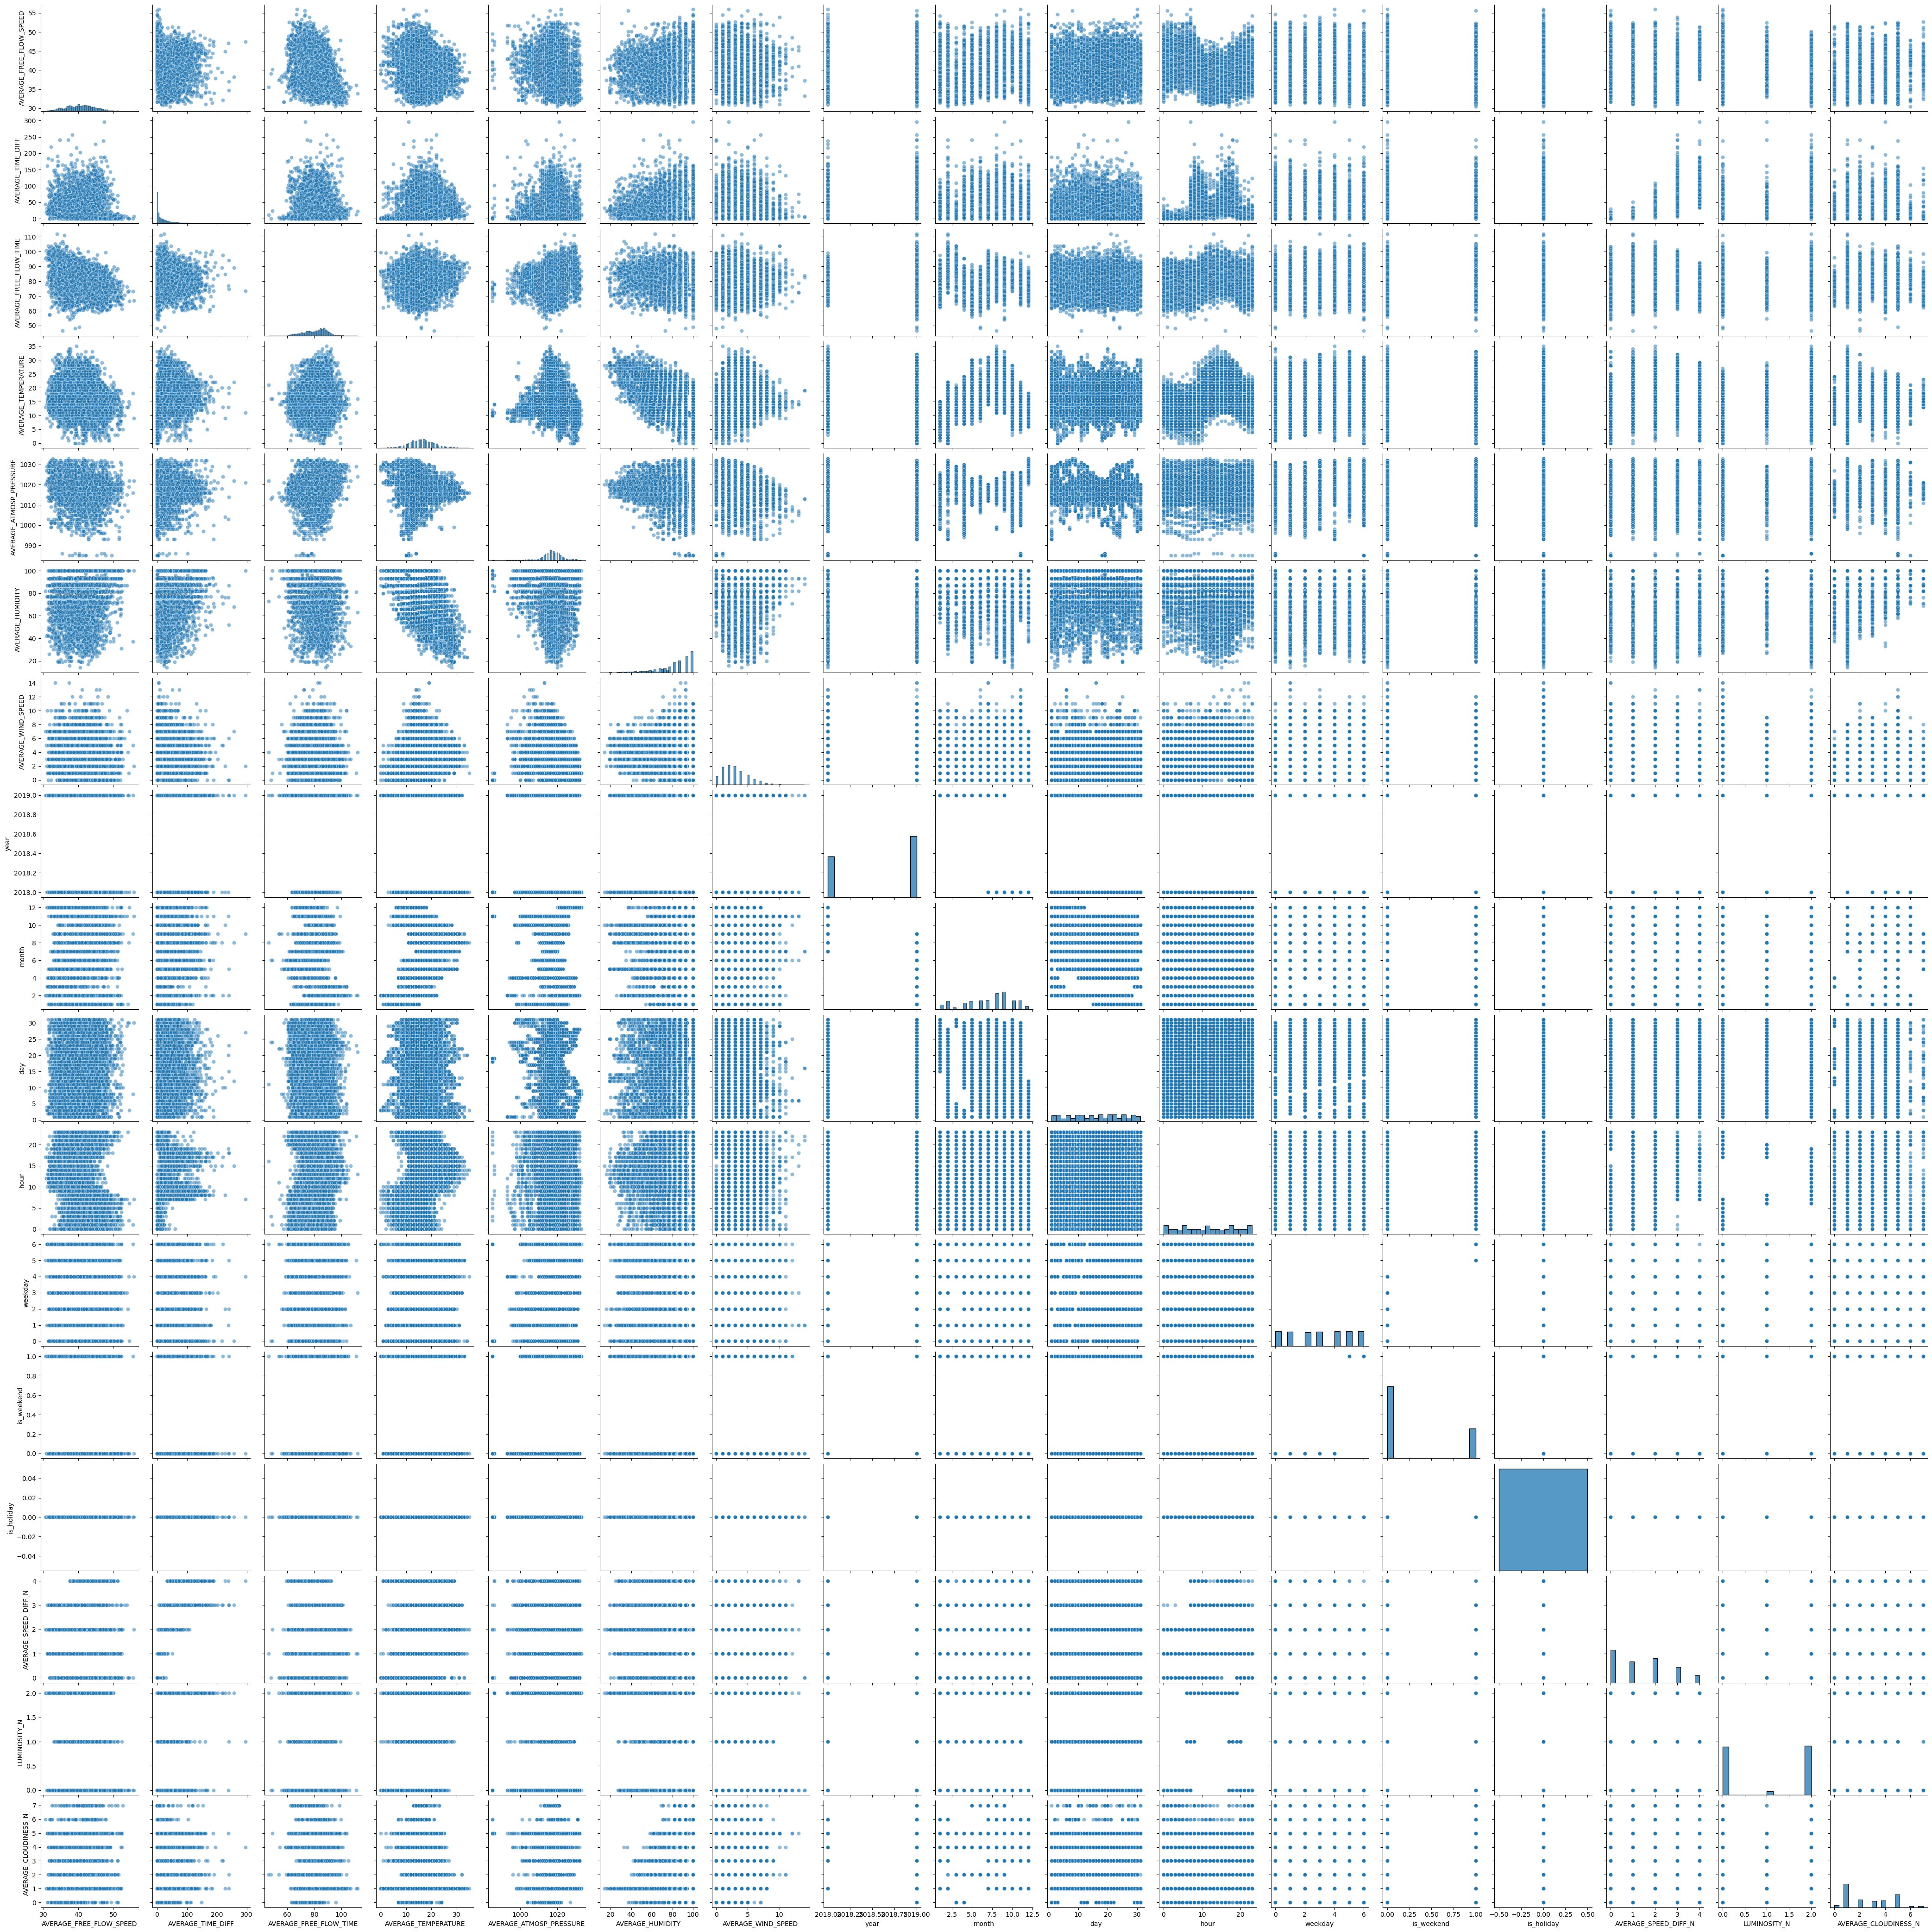

In [68]:
sns.pairplot(data, diag_kind="hist", plot_kws={"alpha": 0.5})
plt.show()


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   record_date              6812 non-null   datetime64[ns]
 1   AVERAGE_SPEED_DIFF       4612 non-null   object        
 2   AVERAGE_FREE_FLOW_SPEED  6812 non-null   float64       
 3   AVERAGE_TIME_DIFF        6812 non-null   float64       
 4   AVERAGE_FREE_FLOW_TIME   6812 non-null   float64       
 5   LUMINOSITY               6812 non-null   object        
 6   AVERAGE_TEMPERATURE      6812 non-null   float64       
 7   AVERAGE_ATMOSP_PRESSURE  6812 non-null   float64       
 8   AVERAGE_HUMIDITY         6812 non-null   float64       
 9   AVERAGE_WIND_SPEED       6812 non-null   float64       
 10  AVERAGE_CLOUDINESS       4130 non-null   object        
 11  year                     6812 non-null   int32         
 12  month                    6812 non-

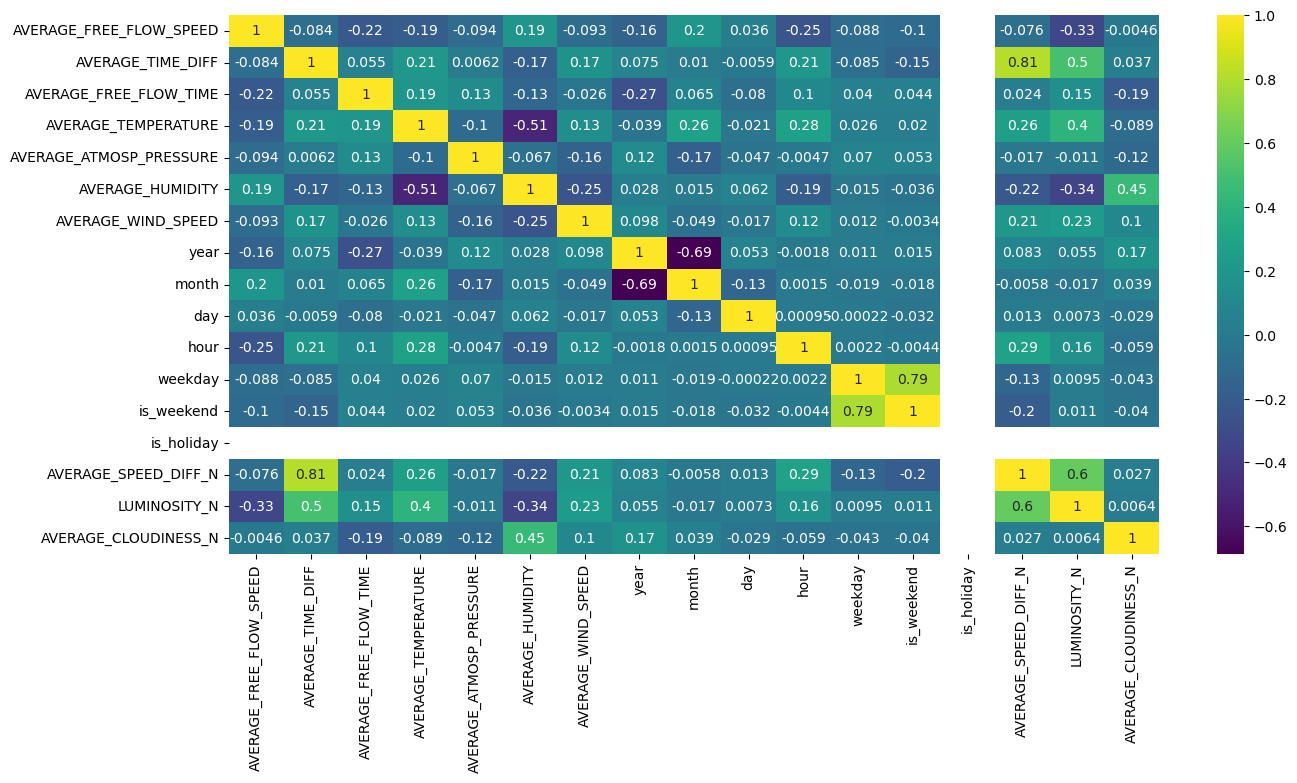

In [70]:
numeric_data = data.select_dtypes(include='number')
plt.figure(figsize=(15, 7))
sns.heatmap(numeric_data.corr(), annot=True, cmap="viridis")
plt.show()

Text(0.5, 1.0, 'Matriz de Correlação - Variáveis de Tráfego')

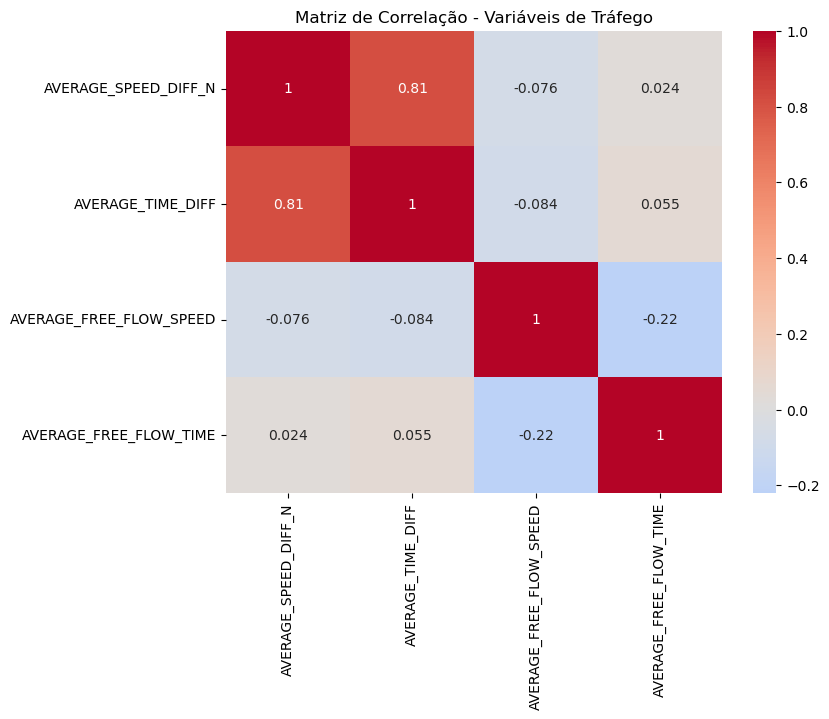

In [71]:
traffic_vars = ['AVERAGE_SPEED_DIFF_N', 'AVERAGE_TIME_DIFF', 'AVERAGE_FREE_FLOW_SPEED',
                'AVERAGE_FREE_FLOW_TIME']
corr_matrix = data[traffic_vars].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação - Variáveis de Tráfego')

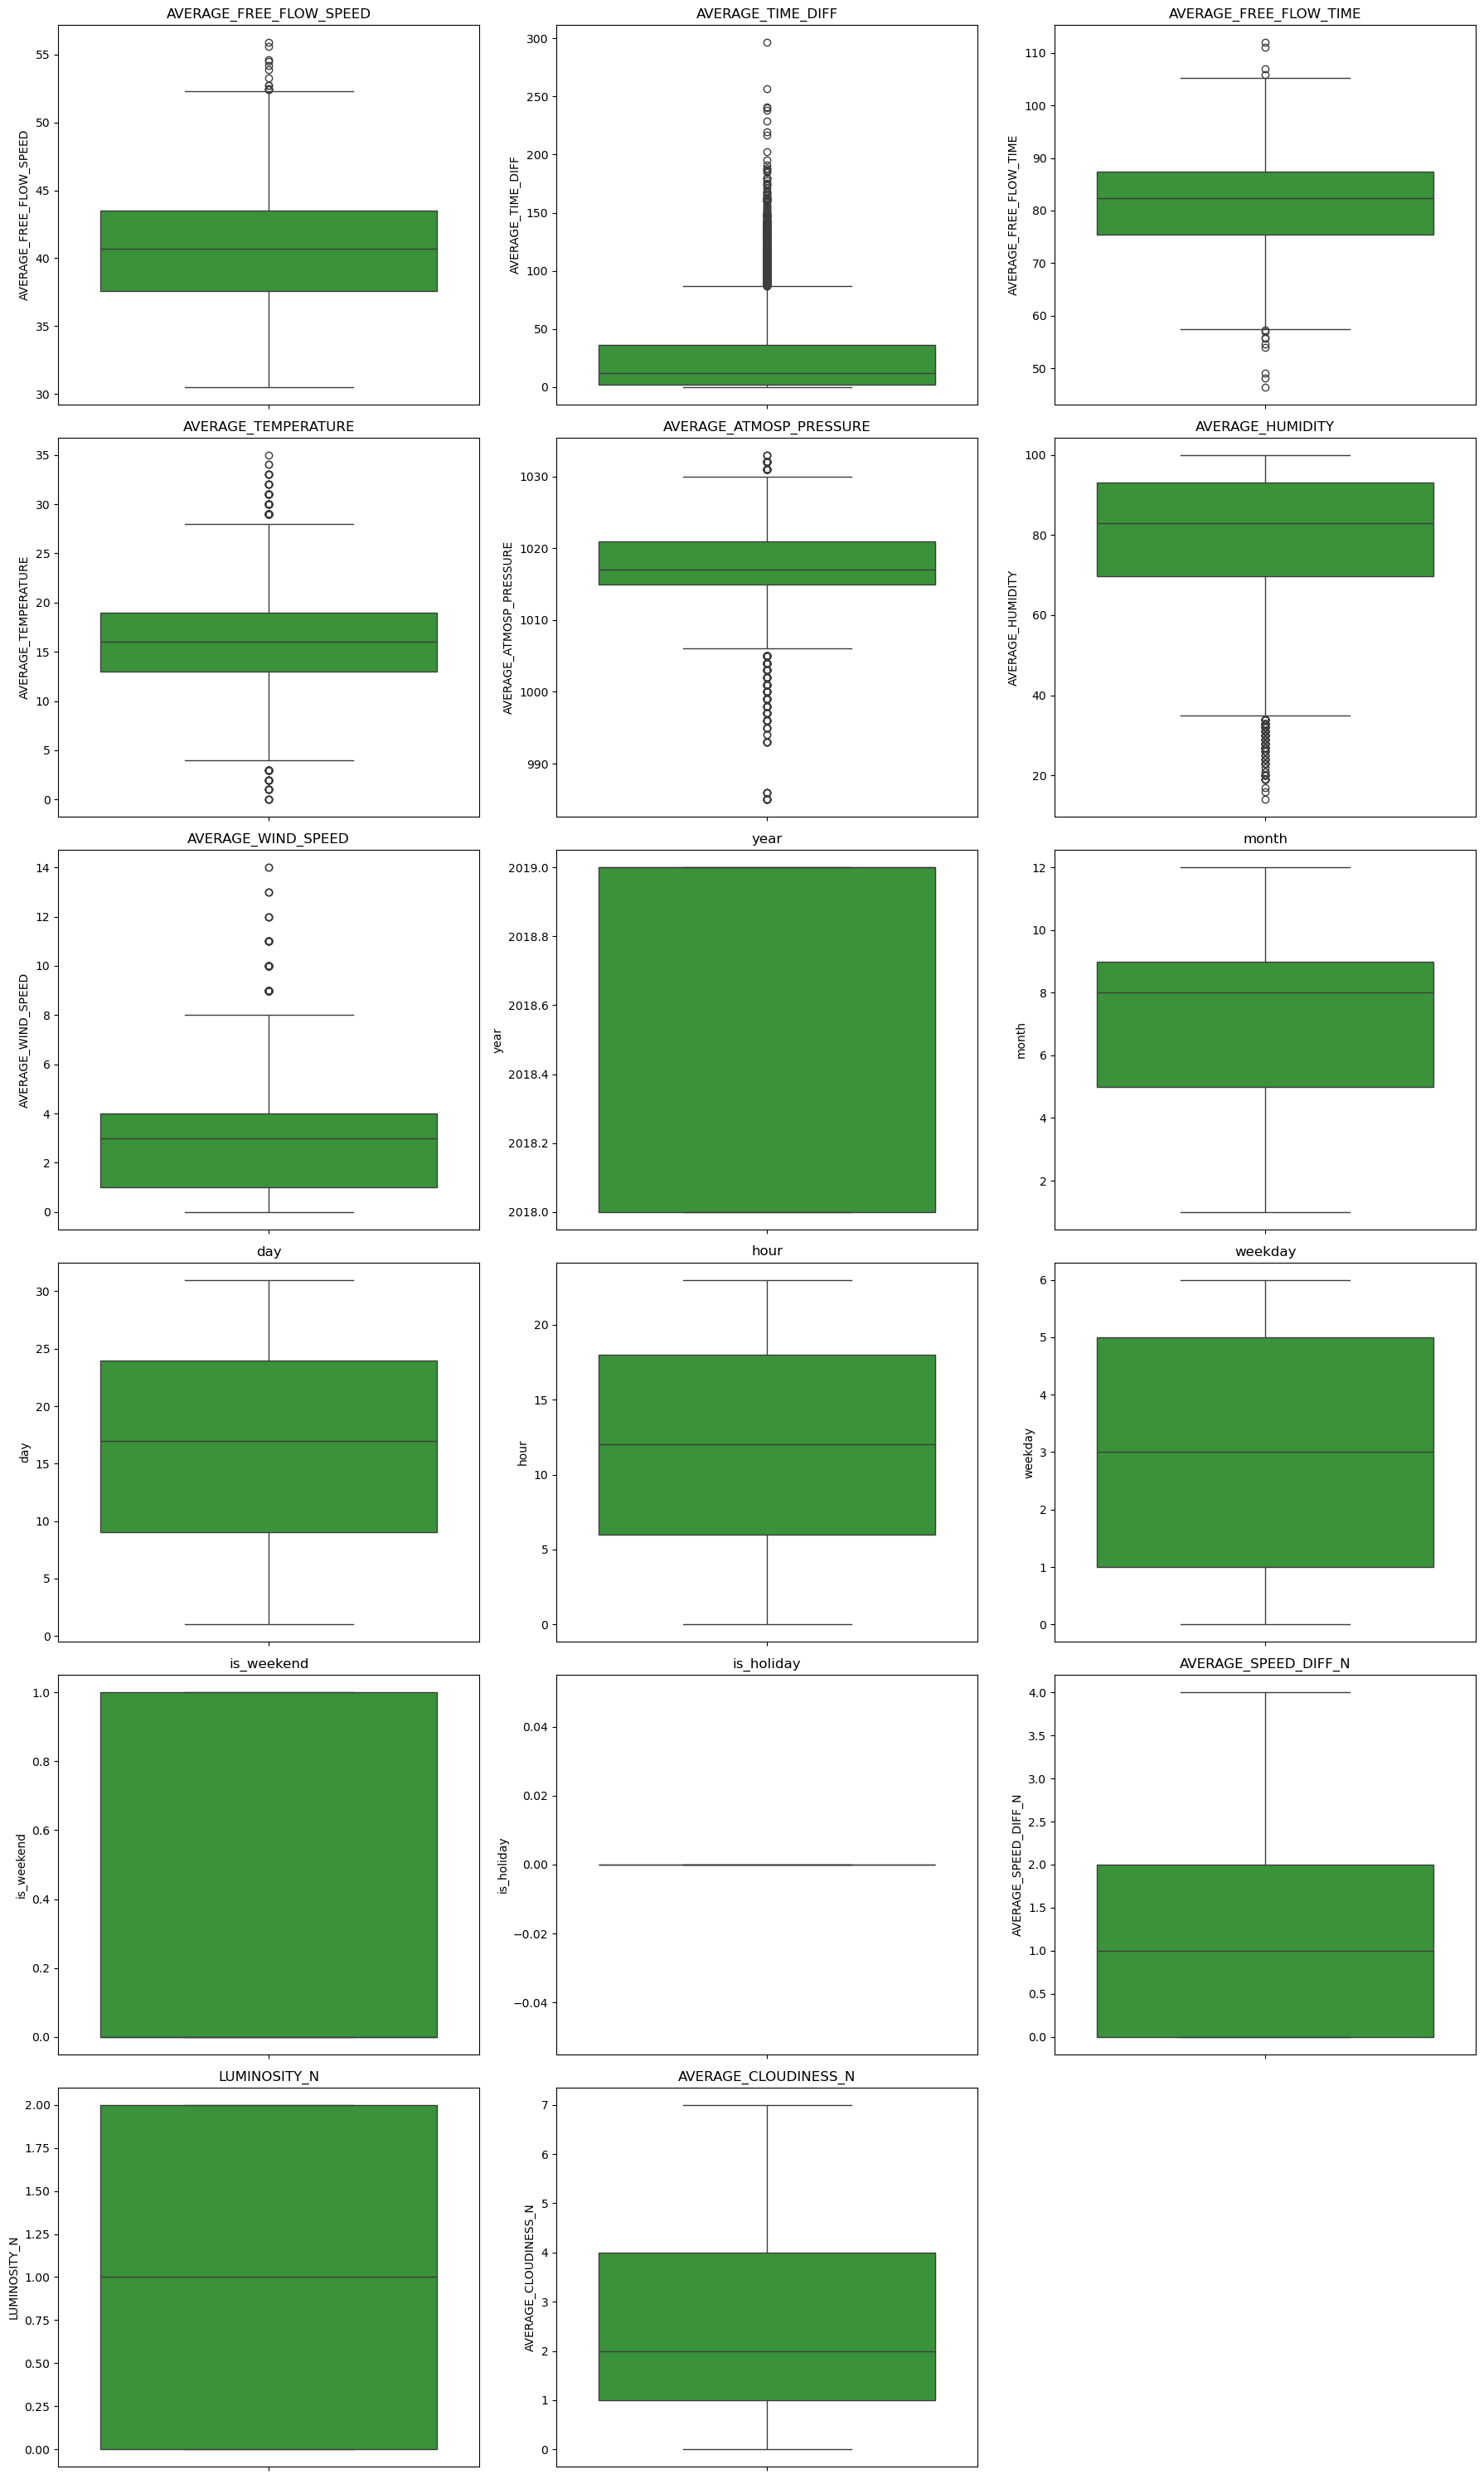

In [72]:
n_cols = len(numeric_data.columns)
n_rows = (n_cols // 3) + 1  

plt.figure(figsize=(18, n_rows * 5))

for i, col in enumerate(numeric_data.columns):
    plt.subplot(n_rows, 3, i+1)
    sns.boxplot(y=numeric_data[col], color="#2ca02c")  
    plt.title(col)

plt.tight_layout()
plt.show()

# Análise Temporal

C:\Users\emman\AppData\Local\Temp\ipykernel_12440\3611137744.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="AVERAGE_SPEED_DIFF", y="AVERAGE_TIME_DIFF", data=data, palette="Greens")


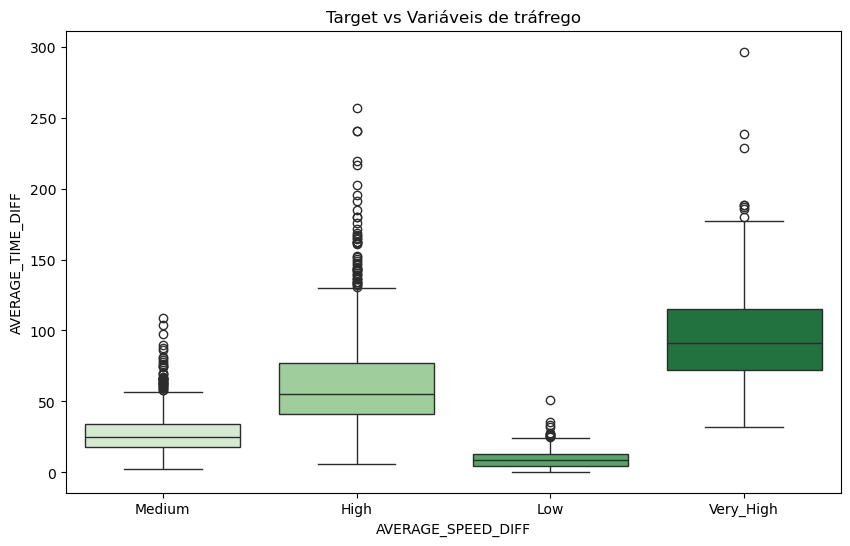

In [73]:
plt.figure(figsize=(10,6))
sns.boxplot(x="AVERAGE_SPEED_DIFF", y="AVERAGE_TIME_DIFF", data=data, palette="Greens")
plt.xlabel("AVERAGE_SPEED_DIFF")
plt.ylabel("AVERAGE_TIME_DIFF")
plt.title("Target vs Variáveis de tráfrego")
plt.show()

In [74]:
hourly_avg = data.groupby('hour')['AVERAGE_TIME_DIFF'].mean()
hourly_avg

hour
0      4.005036
1      3.337631
2      3.076923
3      3.070847
4      2.575000
5      2.529818
6      3.683391
7     29.330389
8     55.523183
9     50.641489
10    41.290000
11    34.797070
12    25.192908
13    20.321053
14    35.218085
15    52.309643
16    57.979359
17    64.031690
18    61.282927
19    32.989789
20    12.203716
21     8.497193
22     6.877076
23     5.873913
Name: AVERAGE_TIME_DIFF, dtype: float64

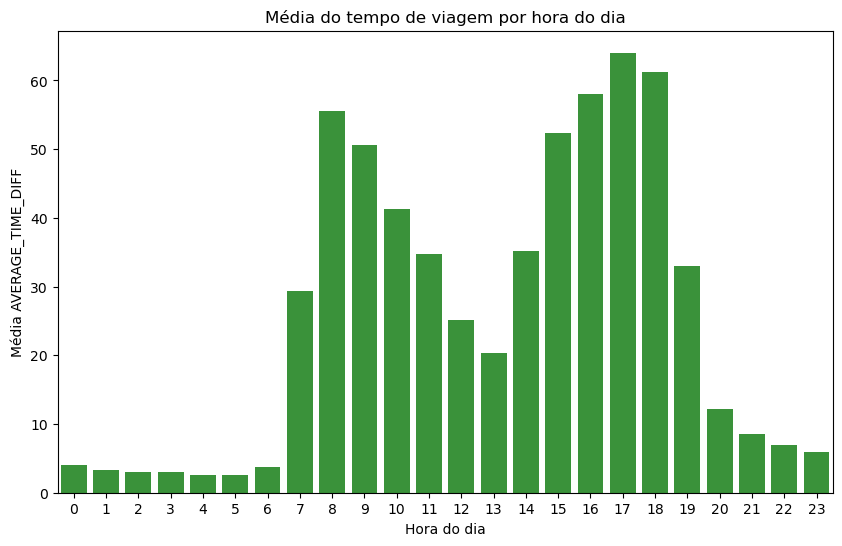

In [75]:
plt.figure(figsize=(10,6))
sns.barplot(x=hourly_avg.index, y=hourly_avg.values, color="#2ca02c")
plt.xlabel("Hora do dia")
plt.ylabel("Média AVERAGE_TIME_DIFF")
plt.title("Média do tempo de viagem por hora do dia")
plt.show()

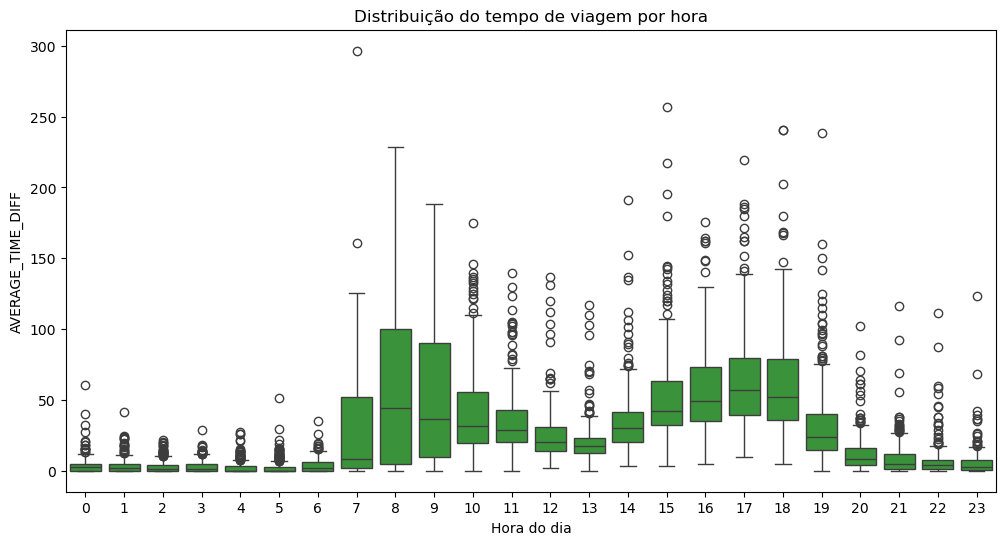

In [76]:
plt.figure(figsize=(12,6))
sns.boxplot(x='hour', y='AVERAGE_TIME_DIFF', data=data, color="#2ca02c")
plt.xlabel("Hora do dia")
plt.ylabel("AVERAGE_TIME_DIFF")
plt.title("Distribuição do tempo de viagem por hora")
plt.show()

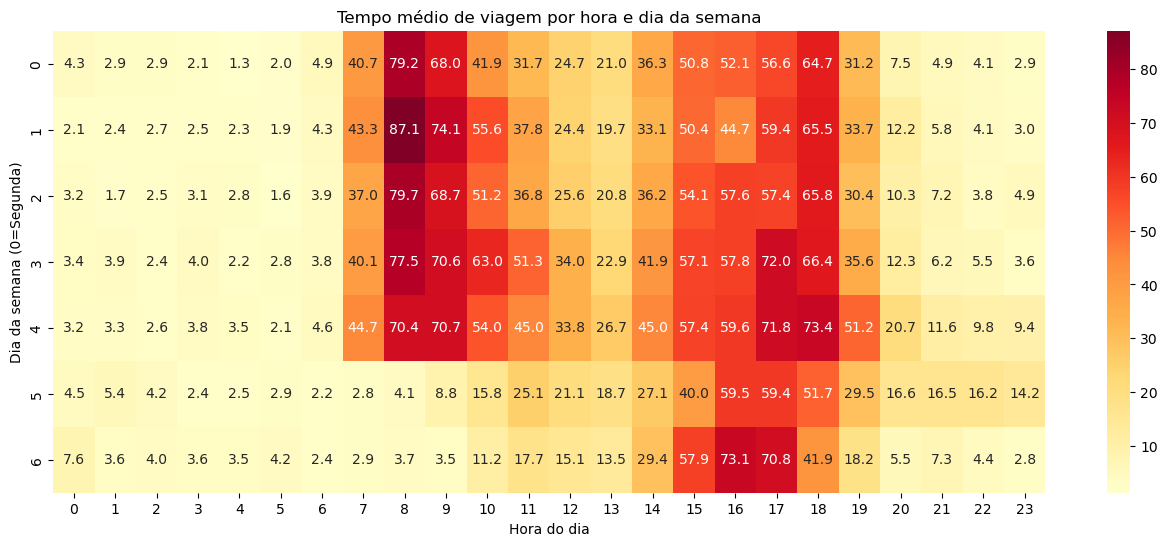

In [77]:
pivot = data.pivot_table(index='weekday', columns='hour', values='AVERAGE_TIME_DIFF', aggfunc='mean')

plt.figure(figsize=(16,6))
sns.heatmap(pivot, cmap="YlOrRd", annot=True, fmt=".1f")
plt.xlabel("Hora do dia")
plt.ylabel("Dia da semana (0=Segunda)")
plt.title("Tempo médio de viagem por hora e dia da semana")
plt.show()


In [78]:


#Definir como horário de pico as horas com média acima da mediana
threshold = hourly_avg.median()
peak_hours = hourly_avg[hourly_avg > threshold].index.tolist()
data['is_peak_hour'] = data['hour'].apply(lambda x: 1 if x in peak_hours else 0)
data[['hour', 'AVERAGE_TIME_DIFF', 'is_peak_hour']].head(10)


hour  AVERAGE_TIME_DIFF  is_peak_hour
0     7               11.5             1
1    14               48.3             1
2    16               38.4             1
3    11               61.0             1
4    12               50.4             1
5     7                5.6             1
6    21                4.0             0
7    19               11.8             1
8    12               10.6             1
9     9               10.1             1

In [79]:
data['is_peak_hour'].value_counts()

is_peak_hour
0    3425
1    3387
Name: count, dtype: int64

C:\Users\emman\AppData\Local\Temp\ipykernel_12440\1233343798.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="season", y="AVERAGE_TIME_DIFF", data=data, palette="Pastel1")


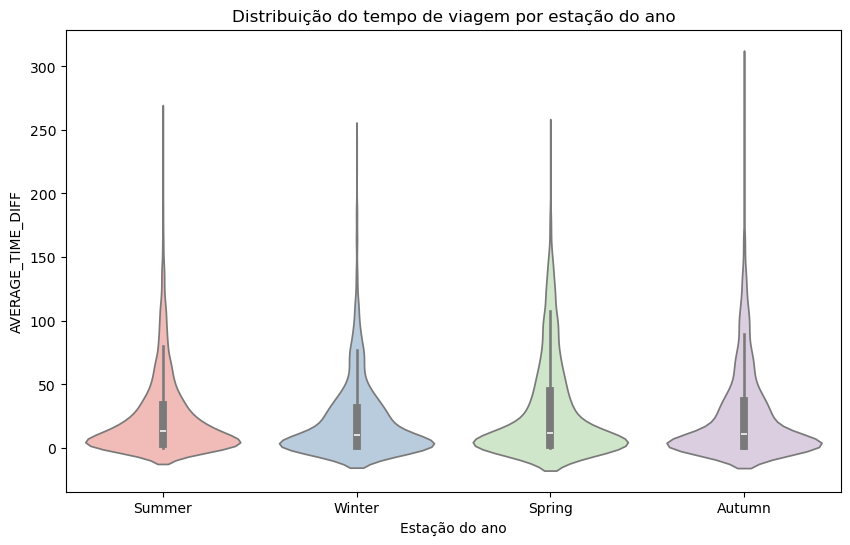

In [80]:
plt.figure(figsize=(10,6))
sns.violinplot(x="season", y="AVERAGE_TIME_DIFF", data=data, palette="Pastel1")
plt.title("Distribuição do tempo de viagem por estação do ano")
plt.xlabel("Estação do ano")
plt.ylabel("AVERAGE_TIME_DIFF")
plt.show()

# Feature Engenieer

- Algumas variáveis já foram criadas na análise para explorar... Faça RUN dessas células acima

In [81]:
data.head(4)

record_date AVERAGE_SPEED_DIFF  AVERAGE_FREE_FLOW_SPEED  \
0 2019-08-29 07:00:00             Medium                     41.5   
1 2018-08-10 14:00:00               High                     41.7   
2 2019-09-01 16:00:00               High                     38.6   
3 2019-02-26 11:00:00               High                     37.4   

   AVERAGE_TIME_DIFF  AVERAGE_FREE_FLOW_TIME LUMINOSITY  AVERAGE_TEMPERATURE  \
0               11.5                    71.4      LIGHT                 15.0   
1               48.3                    87.4      LIGHT                 21.0   
2               38.4                    85.2      LIGHT                 26.0   
3               61.0                    94.1      LIGHT                 18.0   

   AVERAGE_ATMOSP_PRESSURE  AVERAGE_HUMIDITY  AVERAGE_WIND_SPEED  ... day  \
0                   1019.0             100.0                 3.0  ...  29   
1                   1021.0              53.0                 5.0  ...  10   
2                   1014.0              61.0                 4.0  ...   1   
3                   1025.0              48.0                 4.0  ...  26   

   hour  weekday  is_weekend  is_holiday  season  AVERAGE_SPEED_DIFF_N  \
0     7        3           0           0  Summer                     2   
1    14        4           0           0  Summer                     3   
2    16        6           1           0  Summer                     3   
3    11        1           0           0  Winter                     3   

   LUMINOSITY_N AVERAGE_CLOUDINESS_N  is_peak_hour  
0             2                  NaN             1  
1             2                  1.0             1  
2             2                  NaN             1  
3             2                  1.0             1  

[4 rows x 23 columns]

In [82]:
data['poor_visibility'] = ((data['LUMINOSITY_N'] < 2) | (data['AVERAGE_CLOUDINESS_N'] > 3)).astype(int)

In [83]:
data['hour_weekday'] = data['hour'] + data['weekday']*24


In [84]:
data['time_ratio'] = data['AVERAGE_TIME_DIFF'] / data['AVERAGE_FREE_FLOW_TIME']


In [85]:
data.to_csv('pos_analyse.csv')